## Importing Libraries and Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_csv('data/final.csv')

#### Qucik overview 

In [4]:
df.shape

(1000, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1000 non-null   object 
 1   upc          1000 non-null   object 
 2   category     1000 non-null   object 
 3   price_e_tax  1000 non-null   float64
 4   price_i_tax  1000 non-null   float64
 5   tax          1000 non-null   float64
 6   rating       1000 non-null   object 
 7   reviews      1000 non-null   int64  
 8   quantity     1000 non-null   object 
 9   stock        1000 non-null   object 
 10  book_link    1000 non-null   object 
 11  img_link     1000 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 93.9+ KB


In [6]:
df.head()

,title,upc,category,price_e_tax,price_i_tax,tax,rating,reviews,quantity,stock,book_link,img_link
0,A Light in the Attic,a897fe39b1053632,Poetry,51.77,51.77,0.0,Three,0,In stock (22 available),In stock,https://books.toscrape.com/catalogue/a-light-i...,https://books.toscrape.com/../media/cache/2c/d...
1,Tipping the Velvet,90fa61229261140a,Historical Fiction,53.74,53.74,0.0,One,0,In stock (20 available),In stock,https://books.toscrape.com/catalogue/tipping-t...,https://books.toscrape.com/../media/cache/26/0...
2,Soumission,6957f44c3847a760,Fiction,50.10,50.10,0.0,One,0,In stock (20 available),In stock,https://books.toscrape.com/catalogue/soumissio...,https://books.toscrape.com/../media/cache/3e/e...
3,Sharp Objects,e00eb4fd7b871a48,Mystery,47.82,47.82,0.0,Four,0,In stock (20 available),In stock,https://books.toscrape.com/catalogue/sharp-obj...,https://books.toscrape.com/../media/cache/32/5...
4,Sapiens: A Brief History of Humankind,4165285e1663650f,History,54.23,54.23,0.0,Five,0,In stock (20 available),In stock,https://books.toscrape.com/catalogue/sapiens-a...,https://books.toscrape.com/../media/cache/be/a...


## Data Cleaning and Preparation

In [7]:
# Check for missing values
print(df.isnull().sum())

title          0
upc            0
category       0
price_e_tax    0
price_i_tax    0
tax            0
rating         0
reviews        0
quantity       0
stock          0
book_link      0
img_link       0
dtype: int64


#### If there is only one unique value, it may not provide meaningful information for analysis.

In [8]:
print(df['tax'].unique())

[0.]


#### This can help understand book popularity, but if all values are the same, it may not be useful.

In [9]:
print(df['reviews'].unique())

[0]


#### Since all rows have the same value ('In stock'), this column is not informative and could be dropped.

In [10]:
print(df['stock'].unique())

['In stock']


#### The 'price_i_tax' and 'price_e_tax' columns are identical because the 'tax' column has only 0 for all books.                                                        Therefore, including both price columns is redundant.

In [11]:
df['price_i_tax'].equals(df['price_e_tax'])

True

#### Dropping columns that not provide meaningful information for analysis.

In [12]:
df.drop(columns= ['tax','reviews','stock','price_i_tax'], inplace = True)

In [13]:
df.rename(columns={'price_e_tax': 'price'}, inplace=True)

#### Clean rating (convert from words like "Three" → 3):

In [14]:
rating_map = {'One':1, 'Two':2, 'Three':3, 'Four':4, 'Five':5}
df['rating'] = df['rating'].map(rating_map)

#### Removing non-numeric characters (like 'In stock (22 available)').

In [15]:
df['quantity'] = df['quantity'].apply(lambda x: int(''.join(filter(str.isdigit, x))) if any(c.isdigit() for c in x) else 0)


In [16]:
df.head()

,title,upc,category,price,rating,quantity,book_link,img_link
0,A Light in the Attic,a897fe39b1053632,Poetry,51.77,3,22,https://books.toscrape.com/catalogue/a-light-i...,https://books.toscrape.com/../media/cache/2c/d...
1,Tipping the Velvet,90fa61229261140a,Historical Fiction,53.74,1,20,https://books.toscrape.com/catalogue/tipping-t...,https://books.toscrape.com/../media/cache/26/0...
2,Soumission,6957f44c3847a760,Fiction,50.10,1,20,https://books.toscrape.com/catalogue/soumissio...,https://books.toscrape.com/../media/cache/3e/e...
3,Sharp Objects,e00eb4fd7b871a48,Mystery,47.82,4,20,https://books.toscrape.com/catalogue/sharp-obj...,https://books.toscrape.com/../media/cache/32/5...
4,Sapiens: A Brief History of Humankind,4165285e1663650f,History,54.23,5,20,https://books.toscrape.com/catalogue/sapiens-a...,https://books.toscrape.com/../media/cache/be/a...


## Univariate Analysis

#### Distribution of ratings

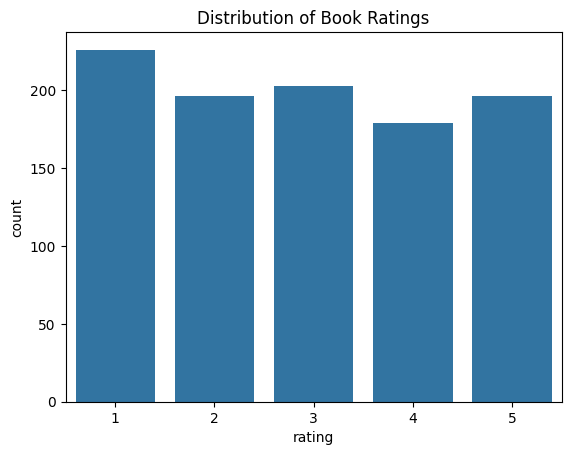

In [17]:
sns.countplot(x='rating', data=df)
plt.title("Distribution of Book Ratings")
plt.show()

## Insights from above visualization
##### Most of the books are given a low rating (1).

#### Price distribution

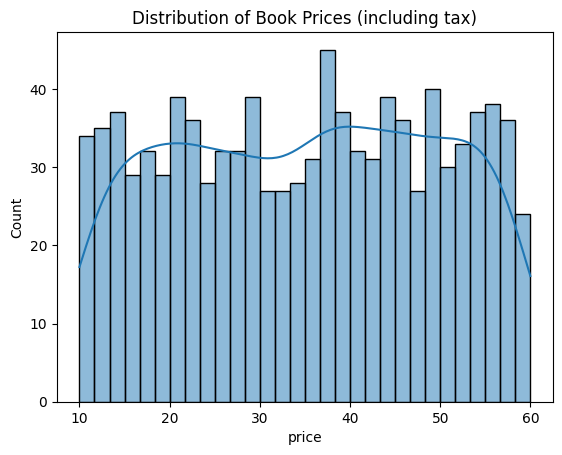

In [18]:
sns.histplot(df['price'], bins=30, kde=True)
plt.title("Distribution of Book Prices (including tax)")
plt.show()

## Insights from above visualization
##### Book prices are spread fairly evenly between £10 and £60, with no extreme peaks. Most books cluster between £20–£50, indicating a balanced pricing strategy.

#### Quantity Distribution

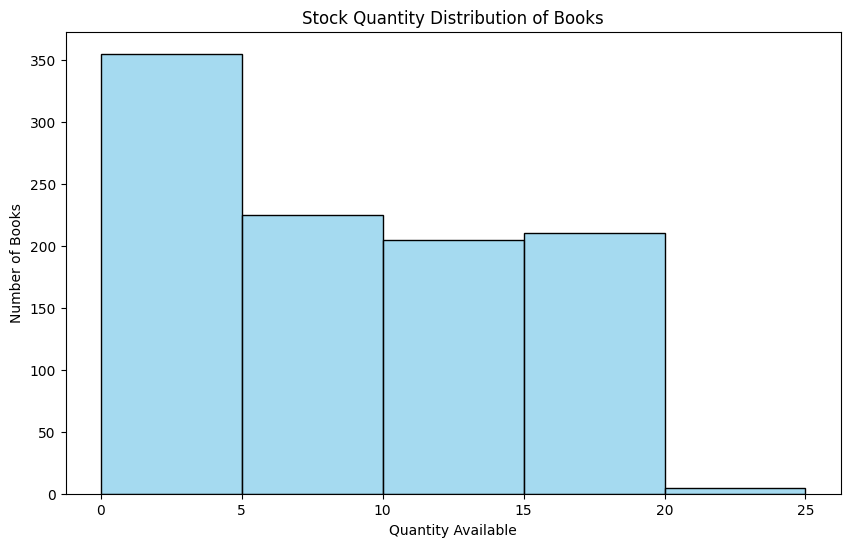

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['quantity'], bins=range(0, max(df['quantity'])+5, 5), kde=False, color="skyblue")
plt.title("Stock Quantity Distribution of Books")
plt.xlabel("Quantity Available")
plt.ylabel("Number of Books")
plt.show()

## Insights from above visualization
#### Most books have low stock quantities, and only a small number of titles have a large quantity available.

## Categorical Analysis

#### Top 10 categories

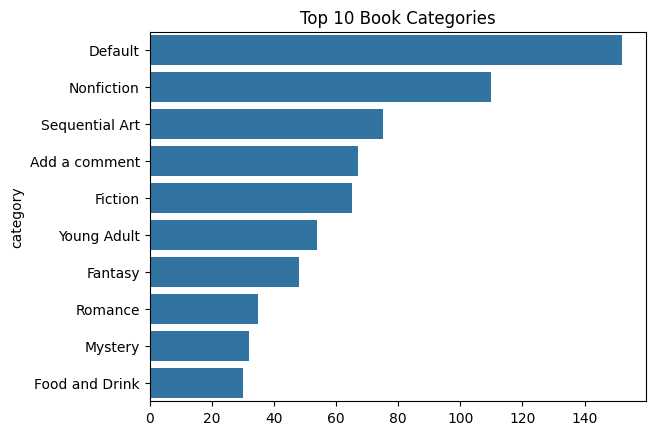

In [19]:
top_categories = df['category'].value_counts().head(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title("Top 10 Book Categories")
plt.show()

## Insights from above visualization
#### Most of the books fall under the Default Category.

## Bivariate Analysis

#### Price vs Rating

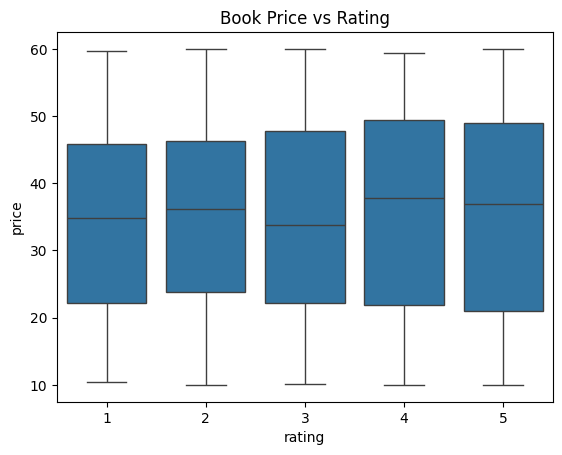

In [20]:
sns.boxplot(x='rating', y='price', data=df)
plt.title("Book Price vs Rating")
plt.show()

## Insights from above visualization
##### Book prices are fairly consistent across all ratings. Higher ratings (4–5) do not guarantee higher prices.

#### Category vs Rating

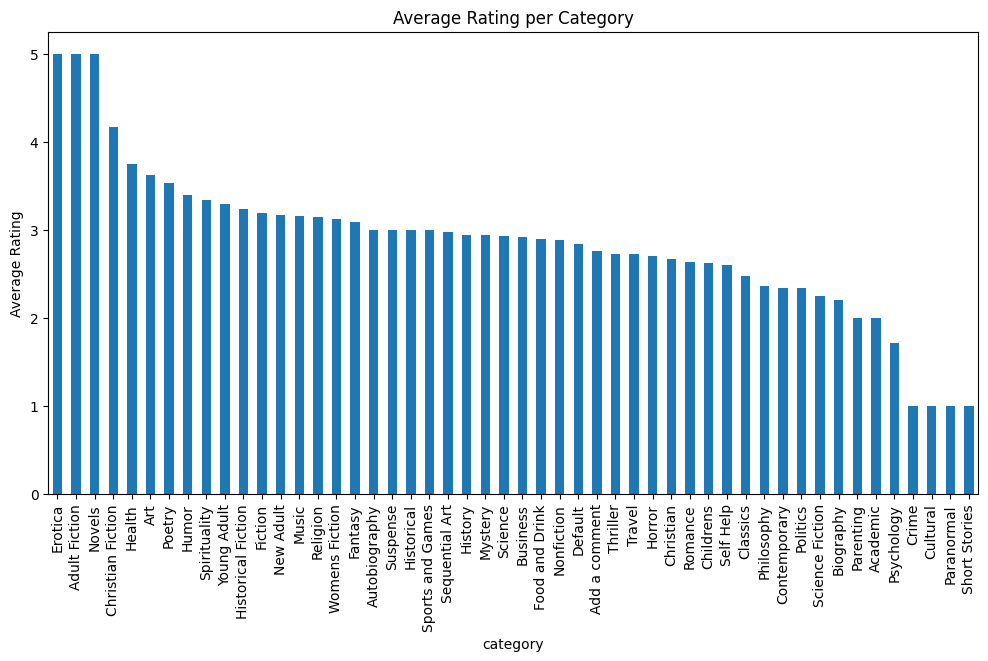

In [21]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating.plot(kind='bar', figsize=(12,6))
plt.title("Average Rating per Category")
plt.ylabel("Average Rating")
plt.show()

## Insights from above visualization
##### Erotica, Adult Fiction, and Christian Fiction are the highest-rated categories, all with an average rating of 4.0 or above. Whereas, Psychology, Cultural, and Short Stories have the lowest average ratings, all below 2.0.

#### Category vs Price

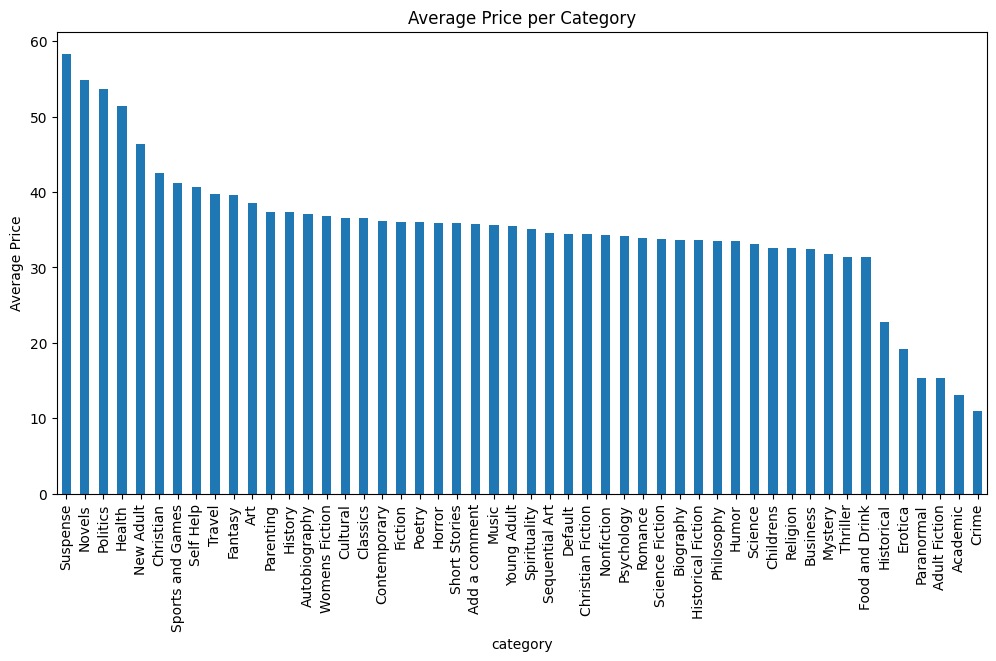

In [22]:
avg_price = df.groupby('category')['price'].mean().sort_values(ascending=False)
avg_price.plot(kind='bar', figsize=(12,6))
plt.title("Average Price per Category")
plt.ylabel("Average Price")
plt.show()

## Insights from above visualization
##### Suspense, Novels, Politics are the most expensive categories, all above £50. Whereas, Academic and Crime are the least expensive ones nearly £10.

#### Price vs Quantity

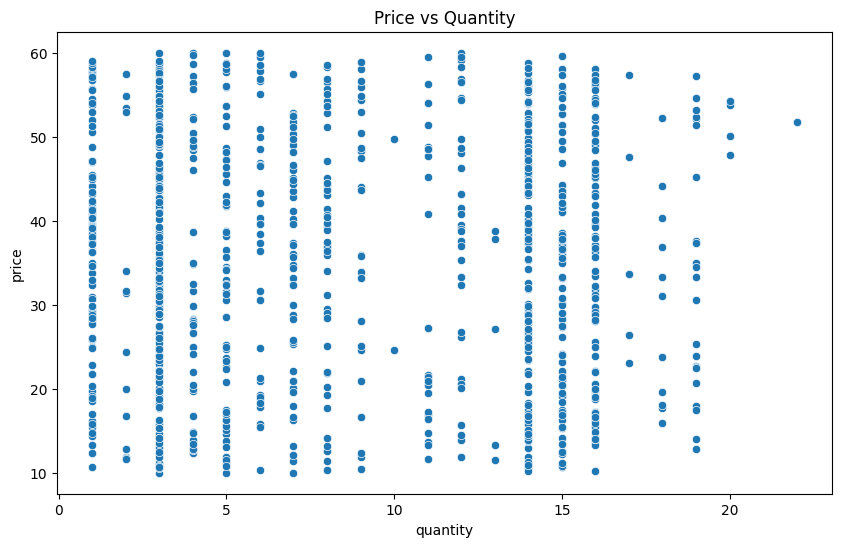

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='quantity', y='price', data=df)
plt.title("Price vs Quantity")
plt.show()

## Insights from above visualization
##### Price and quantity show no clear relationship. Books are stocked in fixed batches (like 5, 10, 15), while pricing is set independently.